In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from mpl_toolkits.basemap import Basemap

In [3]:
earth_quake = pd.read_csv("earthquakedb.csv")
earth_quake.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic


In [4]:
earth_quake.columns

Index(['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error',
       'Depth Seismic Stations', 'Magnitude', 'Magnitude Type',
       'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap',
       'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID',
       'Source', 'Location Source', 'Magnitude Source', 'Status'],
      dtype='object')

In [6]:
earth = earth_quake[["Date","Latitude","Longitude","Magnitude","Depth","Type"]]
earth.head()

,Date,Latitude,Longitude,Magnitude,Depth,Type
0,01/02/1965,19.246,145.616,6.0,131.6,Earthquake
1,01/04/1965,1.863,127.352,5.8,80.0,Earthquake
2,01/05/1965,-20.579,-173.972,6.2,20.0,Earthquake
3,01/08/1965,-59.076,-23.557,5.8,15.0,Earthquake
4,01/09/1965,11.938,126.427,5.8,15.0,Earthquake


In [7]:
earth.tail()

,Date,Latitude,Longitude,Magnitude,Depth,Type
23407,12/28/2016,38.3917,-118.8941,5.6,12.30,Earthquake
23408,12/28/2016,38.3777,-118.8957,5.5,8.80,Earthquake
23409,12/28/2016,36.9179,140.4262,5.9,10.00,Earthquake
23410,12/29/2016,-9.0283,118.6639,6.3,79.00,Earthquake
23411,12/30/2016,37.3973,141.4103,5.5,11.94,Earthquake


In [8]:
earth["Date"] = pd.to_datetime(earth["Date"])
earth.shape

C:\Users\ai\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


(23412, 6)

In [9]:
earth.pivot_table(index = "Type", values = "Magnitude", aggfunc=len)

,Magnitude
Type,
Earthquake,23232.0
Explosion,4.0
Nuclear Explosion,175.0
Rock Burst,1.0


In [10]:
m = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')

In [16]:
longitudes = earth["Longitude"].tolist()
latitudes = earth["Latitude"].tolist()
#m = Basemap(width=12000000,height=9000000,projection='lcc',
            #resolution=None,lat_1=80.,lat_2=55,lat_0=80,lon_0=-107.)
x,y = m(longitudes,latitudes)

RuntimeError: Can not put single artist in more than one figure

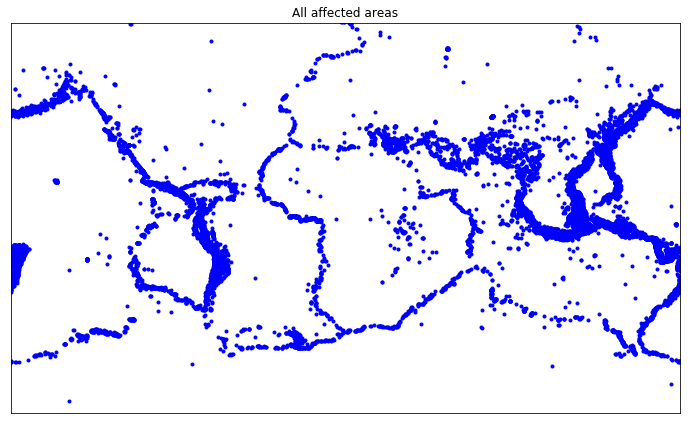

In [21]:
fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 3, color = 'blue')
m.drawcoastlines()
m.fillcontinents(color='coral',lake_color='aqua')
m.drawmapboundary()
m.drawcountries()

In [22]:
minimum = earth["Magnitude"].min()
maximum = earth["Magnitude"].max()
average = earth["Magnitude"].mean()

print("Minimum:", minimum)
print("Maximum:",maximum)
print("Mean",average)

Minimum: 5.5
Maximum: 9.1
Mean 5.882530753460003


Magnitude   Number of Occurence
5-6         16058.0
6-7         6616.0
7-8         698.0
8-9         38.0
9-10         2.0


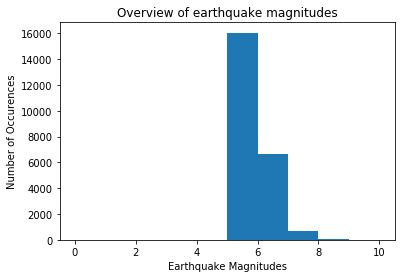

In [23]:
(n,bins, patches) = plt.hist(earth["Magnitude"], range=(0,10), bins=10)
plt.xlabel("Earthquake Magnitudes")
plt.ylabel("Number of Occurences")
plt.title("Overview of earthquake magnitudes")

print("Magnitude" +"   "+ "Number of Occurence")
for i in range(5, len(n)):
    print(str(i)+ "-"+str(i+1)+"         " +str(n[i]))

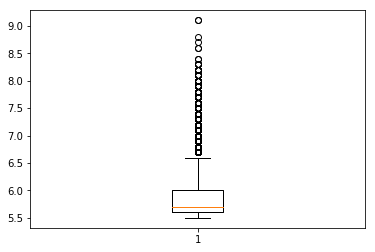

In [25]:
plt.boxplot(earth["Magnitude"]);

In [27]:
highly_affected = earth[earth["Magnitude"]>=8]
print(highly_affected.shape)

(40, 6)


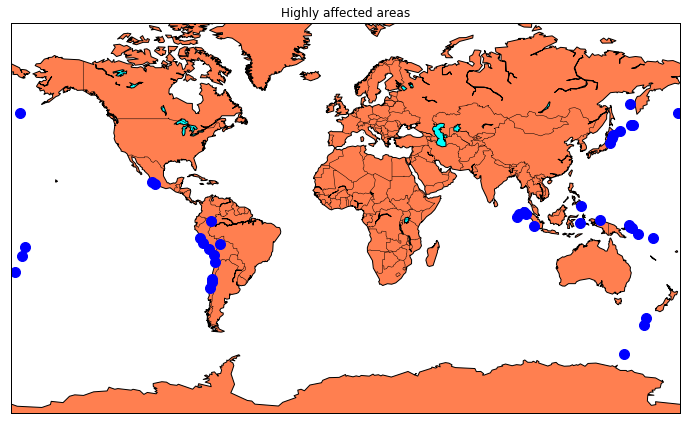

In [28]:


longitudes = highly_affected["Longitude"].tolist()
latitudes = highly_affected["Latitude"].tolist()
n = Basemap(projection='mill',llcrnrlat=-80,urcrnrlat=80, llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
x,y = n(longitudes,latitudes)
fig3 = plt.figure(3,figsize=(12,10))
plt.title("Highly affected areas")
n.plot(x, y, "o", markersize = 10, color = 'blue')
n.drawcoastlines()
n.fillcontinents(color='coral',lake_color='aqua')
n.drawmapboundary()
n.drawcountries()

In [29]:
earth["Month"] = earth['Date'].dt.month

ValueError: Tz-aware datetime.datetime cannot be converted to datetime64 unless utc=True